In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
import pandas as pd
exercise_data = pd.read_csv( './exercise.csv' )
calories_data = pd.read_csv( './calories.csv' )
exercise_data.head(1000)    

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
995,18278454,male,50,185.0,83.0,13.0,97.0,40.3
996,11963638,female,46,151.0,52.0,25.0,113.0,40.5
997,17277065,male,38,185.0,91.0,5.0,82.0,39.2
998,15906490,male,30,189.0,95.0,21.0,103.0,40.8


In [10]:
calories_data.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [12]:
# join both CSV files using User_ID as key and left outer join (preserve exercise_data even if there are no calories)
joined_data = exercise_data.join( calories_data.set_index( 'User_ID' ), on='User_ID', how='left')
joined_data.head(1000)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
995,18278454,male,50,185.0,83.0,13.0,97.0,40.3,74.0
996,11963638,female,46,151.0,52.0,25.0,113.0,40.5,183.0
997,17277065,male,38,185.0,91.0,5.0,82.0,39.2,15.0
998,15906490,male,30,189.0,95.0,21.0,103.0,40.8,123.0


c:\Users\berktug\Documents\MachineLearningCaloriePrediction\venv\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


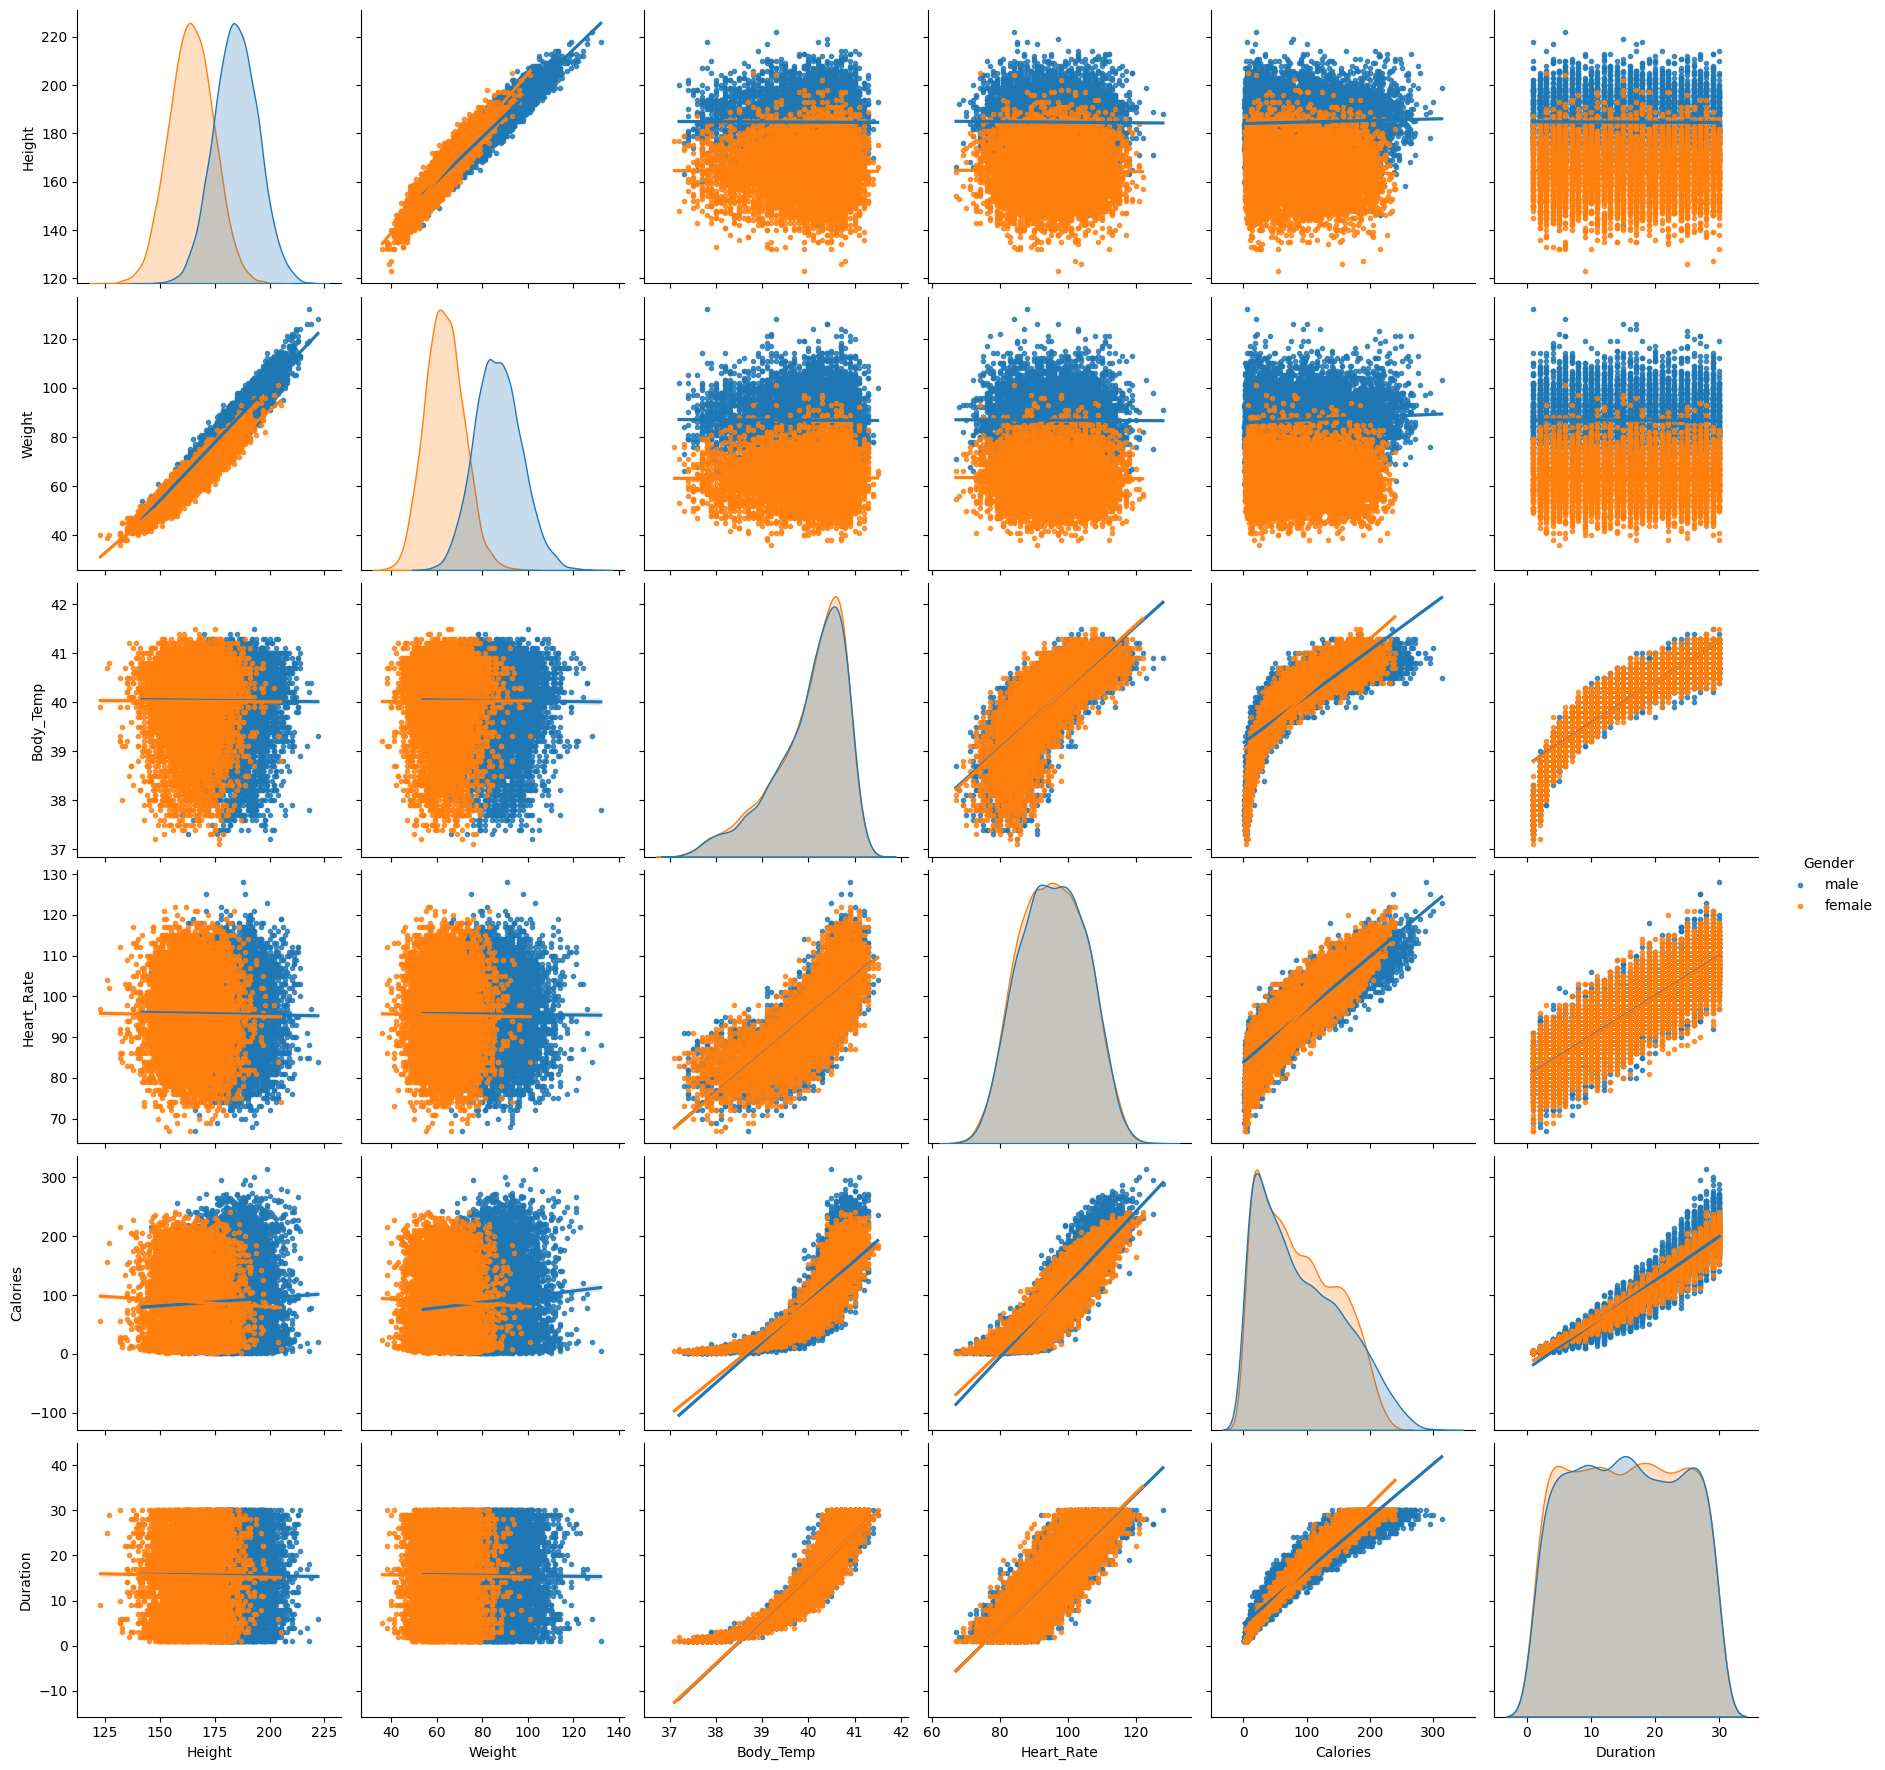

In [13]:
# matrix of scatter plot graphs
%matplotlib inline

import seaborn as sns

cols = [ "Height", "Weight", "Body_Temp", "Heart_Rate", "Calories", "Duration", "Gender" ]

# shows gender in different colors and a linear regression model for each
plot = sns.pairplot( joined_data[ cols ], size=3, markers=".", hue="Gender", kind="reg" )

# get x labels from the last row and save them into an array
xlabels = []
for ax in plot.axes[ -1, : ]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append( xlabel )
    
# apply x labels from the array to the rest of the graphs
y_ax_len = len( plot.axes[ :, 0 ] )
for i in range( len( xlabels ) ):
    for j in range( y_ax_len ):
        if j != i :
            plot.axes[ j, i ].xaxis.set_label_text( xlabels[ i ] )